In [1]:
%matplotlib inline

import io, os, sys, types, datetime, pickle, warnings

import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator

import numpy as np
from numpy.linalg import eig, inv

import math

from scipy import interpolate, spatial, stats

import seaborn as sns

import skimage.io as skiIo
from skimage import exposure, img_as_float

from sklearn import linear_model, metrics

from statannot import add_stat_annotation
# https://github.com/webermarcolivier/statannot

warnings.filterwarnings('ignore')

In [44]:
master_path = os.getcwd()
if master_path not in sys.path:
    sys.path.append(master_path)

In [45]:
def parse_folder_info(path):
    folders = [f for f in os.listdir(path) if not os.path.isfile(os.path.join(path, f))]
    files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]
    if('.DS_Store' in files):
        files.remove('.DS_Store')
    if('._.DS_Store' in files):
        files.remove('._.DS_Store')
    return folders, files

In [46]:
def get_time_columns(columns):
    time_str = []
    time_datetime = []
    for col in columns:
        if col[0].isnumeric():
            time_str.append(col)
            time_datetime.append(datetime.datetime.strptime(col, '%m/%d/%y'))
    return time_str, time_datetime

In [47]:
path_time_series = os.path.join(master_path, 'csse_covid_19_data', 'csse_covid_19_time_series')

In [48]:
folders, files = parse_folder_info(path_time_series)
df_time_series = pd.DataFrame()
# df_time_series_reorged = pd.DataFrame(columns = ['Country/Region', 'Province/State', 'Date', 'Category', 'Number'])
for file_name in files:
    if('.csv' in file_name):
        df_current = pd.read_csv(os.path.join(path_time_series, file_name))        
        category = file_name[21:file_name.index('.csv')]
        print(category)
        df_current.loc[:,'Category'] = category
        if df_time_series.empty:
            df_time_series = df_current
        else:
            df_time_series = df_time_series.append(df_current, ignore_index = True)

time_str, time_datetime = get_time_columns(df_time_series.columns)
# pd.to_datetime()

Confirmed
Deaths
Recovered


In [31]:
df_time_series.loc[:,'New Today'] = df_time_series.loc[:,time_str[-1]] - df_time_series.loc[:,time_str[-2]]

In [12]:
""" Total Recovered, death, and confirmed """

' Total Recovered, death, and confirmed '

Text(0.5, 1.0, 'Daily Cases')

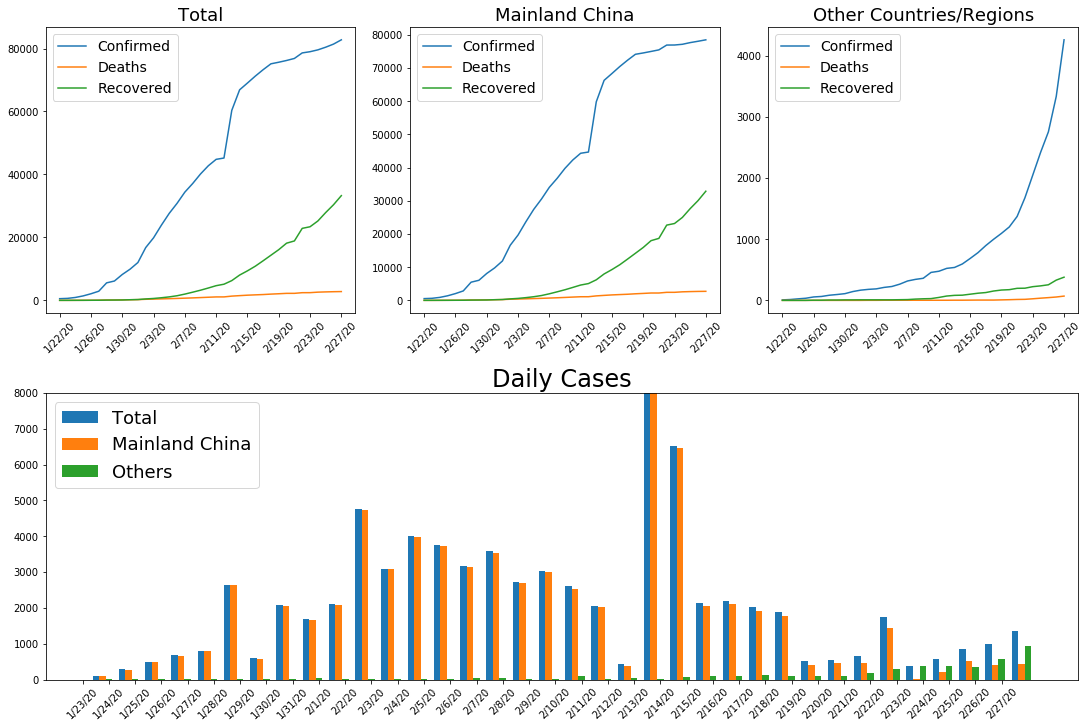

In [16]:
total = df_time_series.groupby('Category').sum().loc[:,time_str]
mainland_china = df_time_series.groupby('Country/Region').get_group('Mainland China').groupby('Category').sum().loc[:,time_str]
others = total - mainland_china

fig = plt.figure(figsize = (15, 10), constrained_layout=True)
gs = fig.add_gridspec(2,3)

ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(total.transpose())
myLocator = mticker.MultipleLocator(4)
ax1.xaxis.set_major_locator(myLocator)
ax1.tick_params(axis = 'x', labelrotation = 45)
ax1.legend(total.index, fontsize = 14)
ax1.set_title('Total', size = 18)

ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(mainland_china.transpose())
myLocator = mticker.MultipleLocator(4)
ax2.xaxis.set_major_locator(myLocator)
ax2.tick_params(axis = 'x', labelrotation = 45)
ax2.legend(mainland_china.index, fontsize = 14)
ax2.set_title('Mainland China', size = 18)

ax3 = fig.add_subplot(gs[0, 2])
ax3.plot(others.transpose())
myLocator = mticker.MultipleLocator(4)
ax3.xaxis.set_major_locator(myLocator)
ax3.tick_params(axis = 'x', labelrotation = 45)
ax3.legend(others.index, fontsize = 14)
ax3.set_title('Other Countries/Regions', size = 18)


ax4 = fig.add_subplot(gs[1, :])

data1 = total.loc['Confirmed',:].to_numpy()[1:] - total.loc['Confirmed',:].to_numpy()[:-1]
data2 = mainland_china.loc['Confirmed',:].to_numpy()[1:] - mainland_china.loc['Confirmed',:].to_numpy()[0:-1]
data3 = others.loc['Confirmed',:].to_numpy()[1:] - others.loc['Confirmed',:].to_numpy()[0:-1]

x = np.arange(len(data1))
width = 0.25
ax4.bar(x + 0, data1, width = width)
ax4.bar(x + width*1, data2, width = width)
ax4.bar(x + width*2, data3, width = width)
ax4.set_yscale('linear')
ax4.set_ylim([0, 8000])
a = ax4.set_xticks(x-width*2)
a = ax4.set_xticklabels(time_str[1:])
ax4.tick_params(axis = 'x', labelrotation = 45)
ax4.legend(['Total', 'Mainland China', 'Others'], fontsize = 18, loc='upper left')
ax4.set_title('Daily Cases', size = 24)


In [17]:
""" Mainland China """

' Mainland China '

Text(0.5, 1.0, 'Daily Cases')

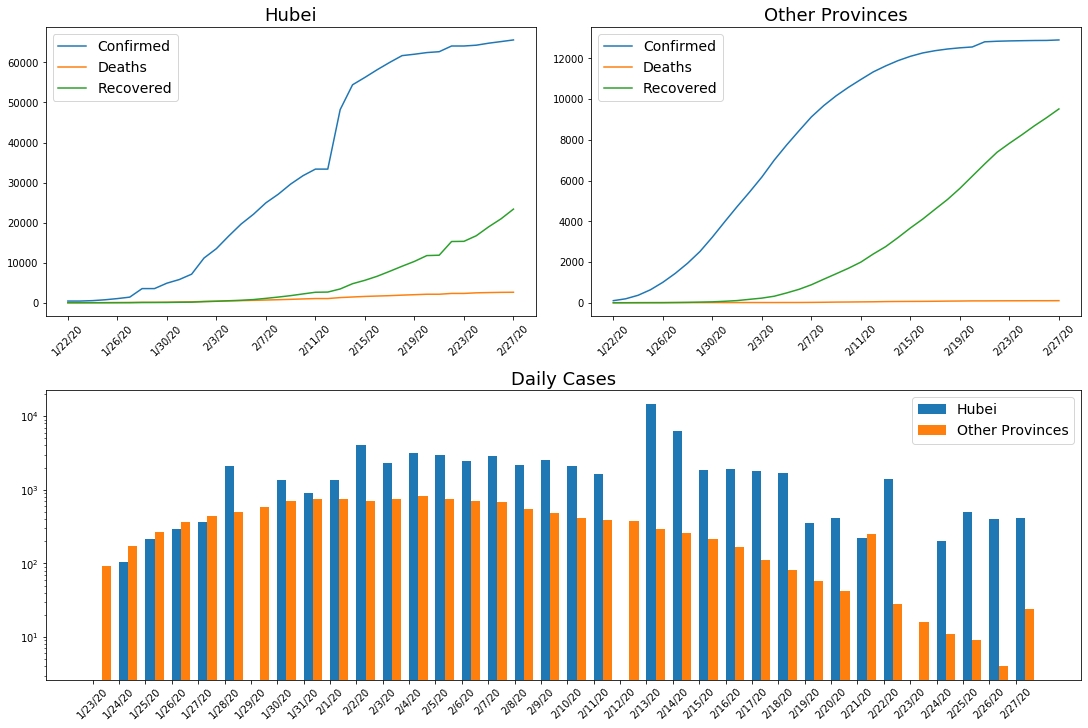

In [21]:
mainland_china_group = df_time_series.groupby('Country/Region').get_group('Mainland China')
total_china = df_time_series.groupby('Country/Region').get_group('Mainland China').groupby('Category').sum().loc[:,time_str]
hubei = mainland_china_group.groupby('Province/State').get_group('Hubei').groupby('Category').sum().loc[:,time_str]
china_others = total_china - hubei

fig = plt.figure(figsize = (15, 10), constrained_layout=True)
gs = fig.add_gridspec(2,2)

ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(hubei.transpose())
myLocator = mticker.MultipleLocator(4)
ax1.xaxis.set_major_locator(myLocator)
ax1.tick_params(axis = 'x', labelrotation = 45)
ax1.legend(hubei.index, fontsize = 14)
ax1.set_title('Hubei', size = 18)

ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(china_others.transpose())
myLocator = mticker.MultipleLocator(4)
ax2.xaxis.set_major_locator(myLocator)
ax2.tick_params(axis = 'x', labelrotation = 45)
ax2.legend(others.index, fontsize = 14)
ax2.set_title('Other Provinces', size = 18)

ax3 = fig.add_subplot(gs[1, :])
data1 = hubei.loc['Confirmed',:].to_numpy()[1:] - hubei.loc['Confirmed',:].to_numpy()[:-1]
data2 = china_others.loc['Confirmed',:].to_numpy()[1:] - china_others.loc['Confirmed',:].to_numpy()[0:-1]
x = np.arange(len(data1))
width = 0.35
rects1 = ax3.bar(x - width/2, data1, width = width)
rects2 = ax3.bar(x + width/2, data2, width = width)
ax3.set_yscale('log')
# ax3.set_ylim([0, 6500])
a = ax3.set_xticks(x-width)
a = ax3.set_xticklabels(time_str[1:])
ax3.tick_params(axis = 'x', labelrotation = 45)
ax3.legend(['Hubei', 'Other Provinces'], fontsize = 14)
ax3.set_title('Daily Cases', size = 18)

In [22]:
""" Outside Mainland China"""

' Outside Mainland China'

In [33]:
df_current = df_time_series.groupby('Category').get_group('Confirmed').groupby('Country/Region').sum()

In [ ]:
### total cases

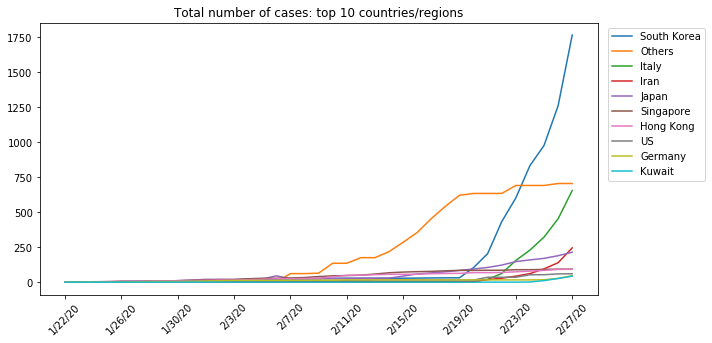

In [35]:
df_current.sort_values(by = time_str[-1], inplace = True, ascending=False)
countries = list(df_current.index[1:11])

df_plot = df_current.loc[countries,time_str]
fig, ax = plt.subplots(1,1,figsize = (10,5))
plt.plot(df_plot.transpose())
plt.legend(countries, bbox_to_anchor=(1.01, 1), loc='upper left', ncol=1)
plt.yscale('linear')
plt.title('Total number of cases: top 10 countries/regions outside Mainland China')
a = plt.xticks(rotation=45)
myLocator = mticker.MultipleLocator(4)
ax.xaxis.set_major_locator(myLocator)

In [ ]:
### new cases

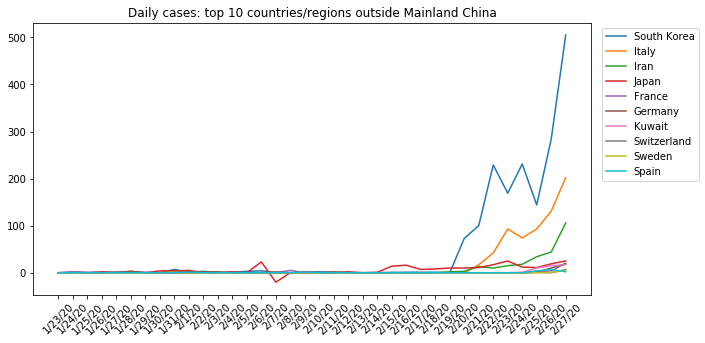

In [39]:
df_current.sort_values(by = 'New Today', inplace = True, ascending=False)
countries = list(df_current.index[0:10])
if('Mainland China' in countries):
    countries.remove('Mainland China')
    countries.append(df_current.index[11])
data = df_current.loc[countries,time_str].to_numpy().transpose()
fig = plt.subplots(1,1,figsize = (10,5))
plt.plot(data[1:,:] - data[0:-1,:])
plt.legend(countries, bbox_to_anchor=(1.01, 1), loc='upper left', ncol=1)
plt.yscale('linear')
plt.title('Daily cases: top 10 countries/regions outside Mainland China')
a = plt.xticks(ticks = np.arange(len(time_str[1:])), labels = time_str[1:], rotation=45)
# myLocator = mticker.MultipleLocator(4)
# ax.xaxis.set_major_locator(myLocator)